In [ ]:
!pip install -q --upgrade diffusers transformers scipy ftfy huggingface_hub

In [ ]:
!pip install -q huggingface_hub --upgrade
!pip install datasets

In [ ]:
from datasets import load_dataset
from huggingface_hub import notebook_login

In [ ]:
notebook_login()

In [ ]:
import torch
from diffusers import StableDiffusionPipeline

pipeline = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", torch_dtype=torch.float32
)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
import os

from IPython.display import Image, display


def generate_images(
    prompt,
    num_images_to_generate,
    num_images_per_prompt=4,
    guidance_scale=8,
    output_dir="images",
    display_images=False,
):

    num_iterations = num_images_to_generate // num_images_per_prompt
    os.makedirs(output_dir, exist_ok=True)

    for i in range(num_iterations):
        images = pipeline(
            prompt, num_images_per_prompt=num_images_per_prompt, guidance_scale=guidance_scale
        )
        for idx, image in enumerate(images.images):
            image_name = f"{output_dir}/image_{(i*num_images_per_prompt)+idx}.png"
            image.save(image_name)
            if display_images:
                display(Image(filename=image_name, width=128, height=128))

  0%|          | 0/50 [00:00<?, ?it/s]

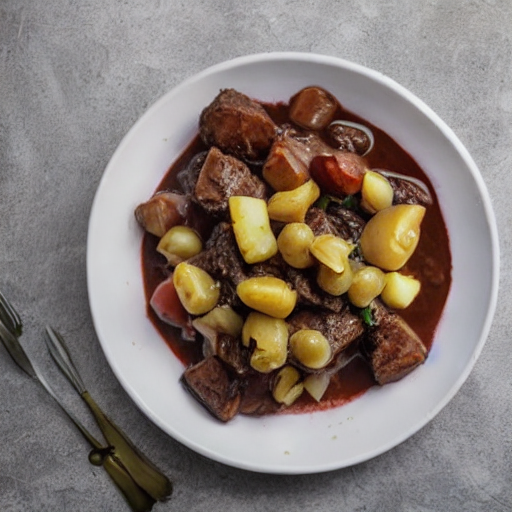

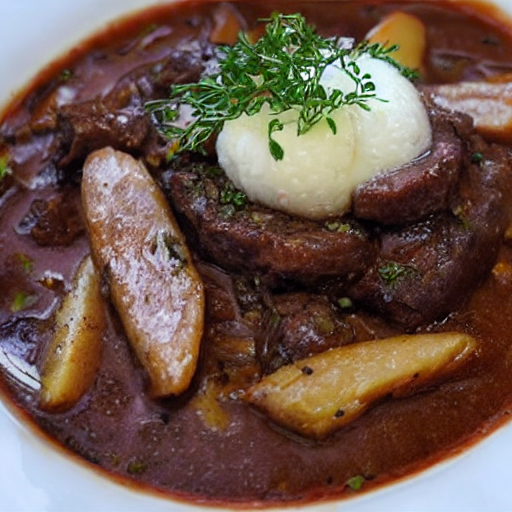

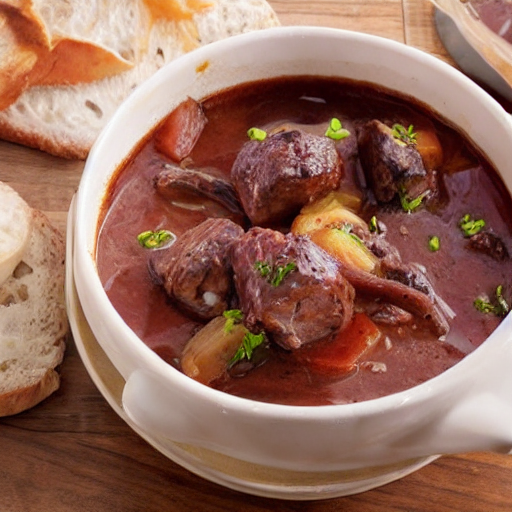

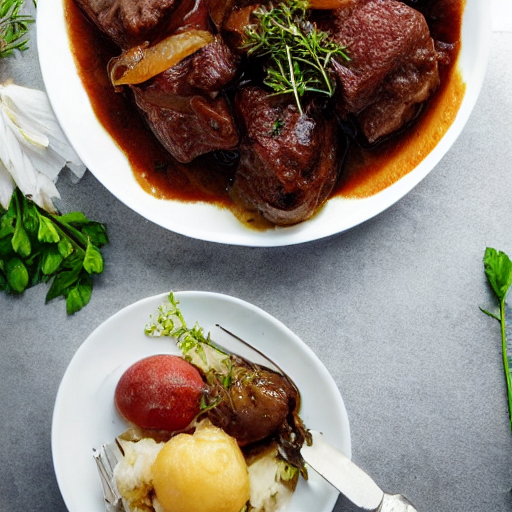

  0%|          | 0/50 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
generate_images("a meal of boeuf bourguignon", 10, guidance_scale=4, display_images=True)

In [ ]:
!git config --global credential.helper store
dataset = load_dataset("/content/images")

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
dataset["train"].features["label"]
dataset = dataset["train"].train_test_split()

KeyError: 'label'

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image'],
        num_rows: 4
    })
})